# Import Libraries

In [87]:
from IPython.display import display, HTML
from google.colab import drive
from google.colab import files
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import f_oneway
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from sklearn.metrics import f1_score
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

# Prepare The Notbook

In [88]:
# Function to create scrollable table within a small window
def create_scrollable_table(data, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += data.to_html()
    html += '</div>'
    return html

    # Header
    table_html += '<thead><tr>'
    table_html += ''.join(f'<th>{col}</th>' for col in data.columns)
    table_html += '</tr></thead><tbody>'

    # Rows
    for _, row in data.iterrows():
        table_html += '<tr>'
        table_html += ''.join(f'<td>{value}</td>' for value in row)
        table_html += '</tr>'

    table_html += '</tbody></table></div>'
    return table_html

# Import Data

In [89]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
data = pd.read_csv('///content/drive/MyDrive/train_titanic.csv')

In [91]:
head = data.head()

# create_scrollable_table is defined somewhere in your code
html_head = create_scrollable_table(head, 'head', 'Head of the dataset')

# Display the HTML table to show all features
display(HTML(html_head))

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Discovring The Data

In [92]:
data.shape

(8693, 14)

In [93]:
data = data.drop('PassengerId', axis=1)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


## Searching About Missing Values

In [95]:
# Null values in the dataset
null_values = data.isnull().sum()
html_null_values = null_values.to_frame().to_html()

# Show missing values
show_missing_values = data[data.isna().any(axis=1)]
html_show_missing_values = show_missing_values.to_html()

# Display HTML tables
display(HTML("<h2>Null Values in the Dataset</h2>" + html_null_values))
display(HTML("<h2>Show Missing Values of Each Feature</h2>" + html_show_missing_values))

,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
25,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False
27,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
28,Europa,True,C/2/S,TRAPPIST-1e,62.0,False,0.0,0.0,NaN,0.0,0.0,Penton Fullided,True
35,Mars,False,F/9/P,TRAPPIST-1e,20.0,False,NaN,0.0,1750.0,990.0,0.0,Dontch Datie,True
38,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,False


there are a lot of missing values that needs to be handled

## Searching About Duplicates

In [96]:
data.duplicated().sum()

0

# EDA and Preprocessing For The Target Variable


In [97]:
# discribe the target
target_summary_stats = data['Transported'].describe().to_frame().T
print(target_summary_stats)
print('-----------------------------')
# the unique values of target variable
print("Unique Values Of Transported : ", data['Transported'].unique())
print('-----------------------------')
#check from balance
churn_value_counts = data['Transported'].value_counts()
print('The Count Of Each Class : ','\n' ,churn_value_counts)

            count unique   top  freq
Transported  8693      2  True  4378
-----------------------------
Unique Values Of Transported :  [False  True]
-----------------------------
The Count Of Each Class :  
 True     4378
False    4315
Name: Transported, dtype: int64


## Target Encoding

In [98]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Churn' column
data['Transported'] = label_encoder.fit_transform(data['Transported'])

# Print the unique values after label encoding
print("Transported ", data['Transported'].unique())

Transported  [0 1]


from the result we note that the target naerly to be balanced , we have 2 classes(False,True) ,and 'true' is the most common class

# EDA and Preprocessing For Numerical Features

In [99]:
#select the numrical features only and drop target
numerical_features = data.select_dtypes(include=['int64', 'float64']).drop(['Transported'],axis=1)

## Ensure from the data types

In [100]:
head_numrical=numerical_features.head()

html_head_numrical = create_scrollable_table(head_numrical, 'head_numrical', 'Head of the numrical features')

# Display the HTML
display(HTML(html_head_numrical))

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [101]:
#the unique values of each numrical feature

def display_unique_values(dataframe):
    unique_values_html = ""
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        unique_values_html += f"<h4>Unique values for {column}:</h4>"
        unique_values_html += "<div style='max-height: 200px; overflow-y: auto;'>"
        unique_values_html += "<ul>"
        for value in unique_values:
            unique_values_html += f"<li>{value}</li>"
        unique_values_html += "</ul>"
        unique_values_html += "</div>"

    display(HTML(unique_values_html))

# Call the function to display unique values
display_unique_values(numerical_features)

## Handling the missing values on the numerical features

In [102]:
def handle_missing_with_median(data):

    for feature in numerical_features:
        num_missing_values_before = data[feature].isnull().sum()
        print(f"Missing values in '{feature}' before handling missing: {num_missing_values_before}")

        # Replace missing values with the median of the feature
        median_imputer = SimpleImputer(strategy='median')
        data[feature] = median_imputer.fit_transform(data[[feature]])

        num_missing_values_after = data[feature].isnull().sum()
        print(f"Missing values in '{feature}' after handling missing: {num_missing_values_after}")
        print("*******************************************************************")

    return data

# Assuming data is your DataFrame
data = handle_missing_with_median(data)

Missing values in 'Age' before handling missing: 179
Missing values in 'Age' after handling missing: 0
*******************************************************************
Missing values in 'RoomService' before handling missing: 181
Missing values in 'RoomService' after handling missing: 0
*******************************************************************
Missing values in 'FoodCourt' before handling missing: 183
Missing values in 'FoodCourt' after handling missing: 0
*******************************************************************
Missing values in 'ShoppingMall' before handling missing: 208
Missing values in 'ShoppingMall' after handling missing: 0
*******************************************************************
Missing values in 'Spa' before handling missing: 183
Missing values in 'Spa' after handling missing: 0
*******************************************************************
Missing values in 'VRDeck' before handling missing: 188
Missing values in 'VRDeck' after handling m

In [103]:
# Convert the 'Age' column to int type
data['Age'] = data['Age'].astype(int)

In [104]:
# Summary statistics for numerical features
# Calculate summary statistics
summary_stats = numerical_features.describe().T

# Create an HTML table
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

# Display the HTML
display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


## ANOVA_Test

In [105]:
target_column = 'Transported'
significance_level = 0.05

# Create a list to store results
results = []

# Perform ANOVA test for each numeric feature
for column in numerical_features:
    if column != target_column:
        # Perform ANOVA test
        _, p = f_oneway(*[data[data[target_column] == group][column] for group in data[target_column].unique()])

        significance = "Significant" if p < significance_level else "Not Significant"

        results.append([column, p, significance])

# Create a DataFrame from the results
result_df = pd.DataFrame(results, columns=["Feature", "P-value", "Significance"])

# Print the tabulated results
print('ANOVA Test Between The Target Variable (Transported) And the Numeric Features:')
print(tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False))

ANOVA Test Between The Target Variable (Transported) And the Numeric Features:
+--------------+-------------------------+-----------------+
|   Feature    |         P-value         |  Significance   |
+--------------+-------------------------+-----------------+
|     Age      |  4.216285538171591e-12  |   Significant   |
| RoomService  | 3.2053937467166093e-115 |   Significant   |
|  FoodCourt   |  2.122240622339601e-05  |   Significant   |
| ShoppingMall |   0.3813140439877879    | Not Significant |
|     Spa      | 1.7019900600459622e-94  |   Significant   |
|    VRDeck    |  4.969700852749172e-83  |   Significant   |
+--------------+-------------------------+-----------------+


from this result we can remove shoppingmall because it is not significant

In [106]:
data = data.drop('ShoppingMall', axis=1)

In [107]:
numerical_features=numerical_features.drop('ShoppingMall',axis=1)

## Searching About Outliers

<Figure size 1600x800 with 0 Axes>

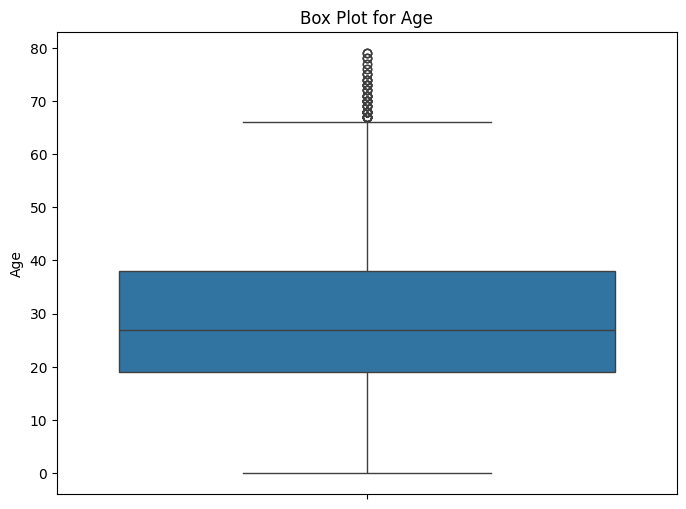

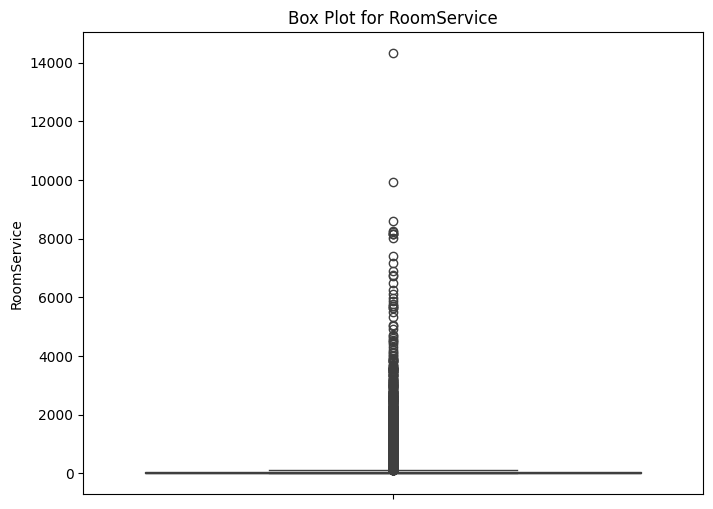

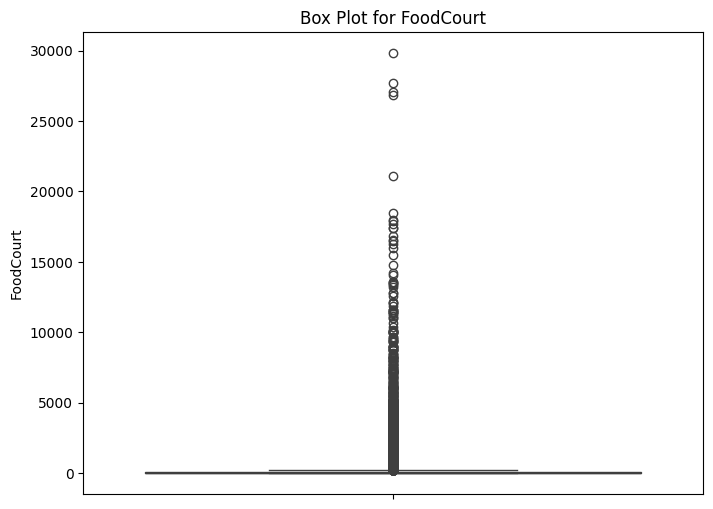

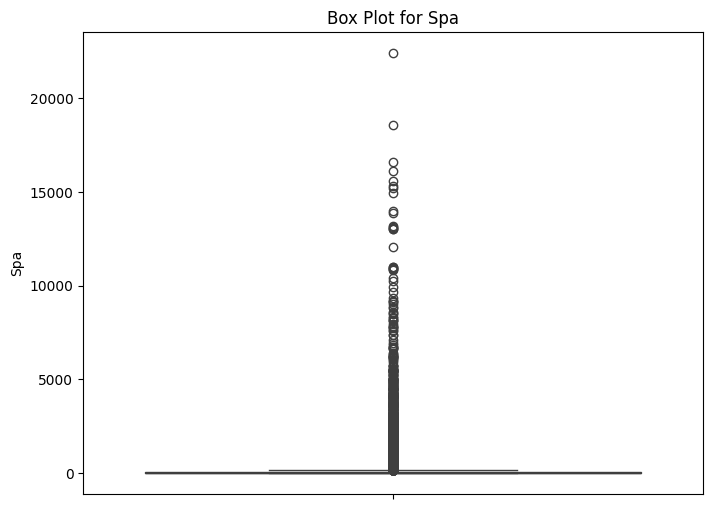

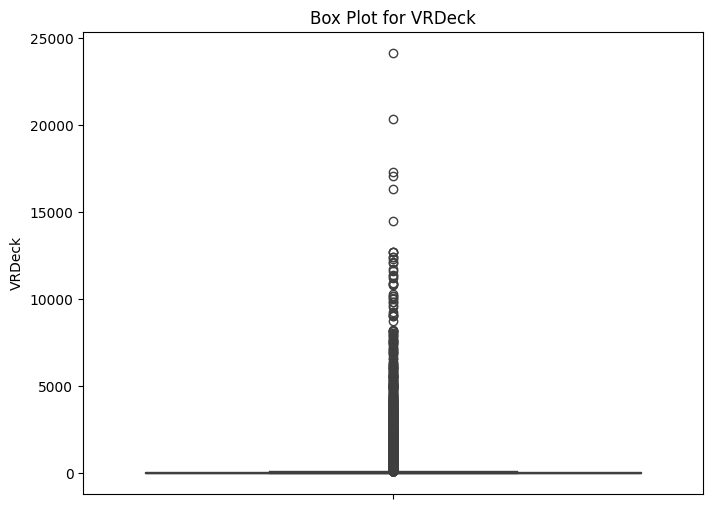

In [108]:
# Set the size of the figure
plt.figure(figsize=(16, 8))

# Iterate through each numerical feature and create a box plot
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=numerical_features[column])  # Use 'y' instead of 'x'
    plt.title(f'Box Plot for {column}')
    plt.show()

## Handling the outliers data

<Figure size 1600x800 with 0 Axes>

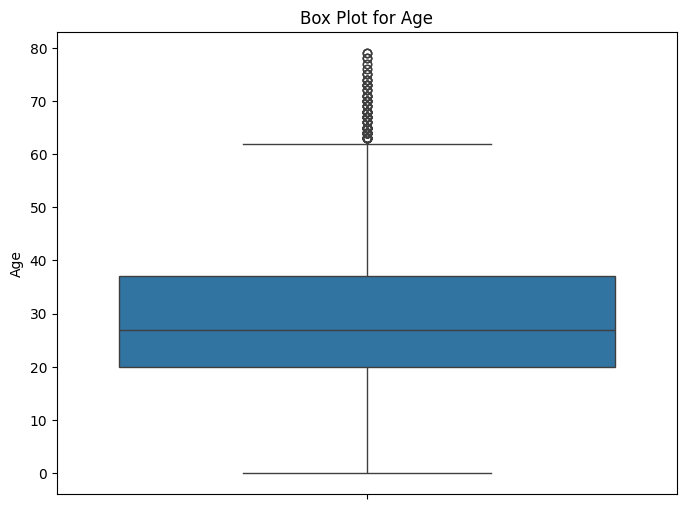

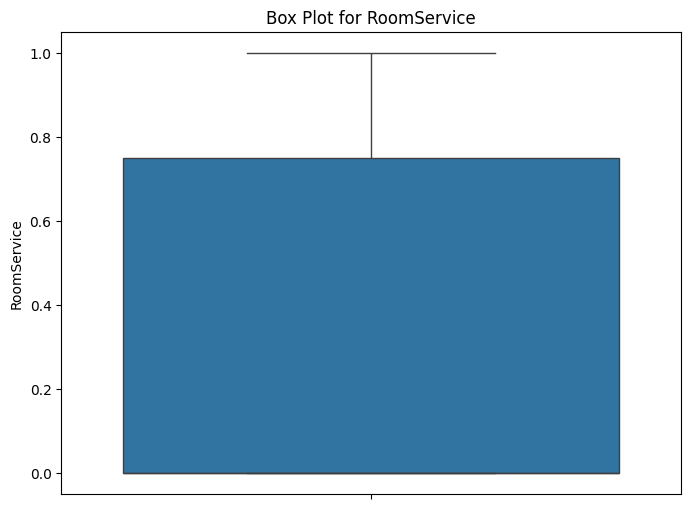

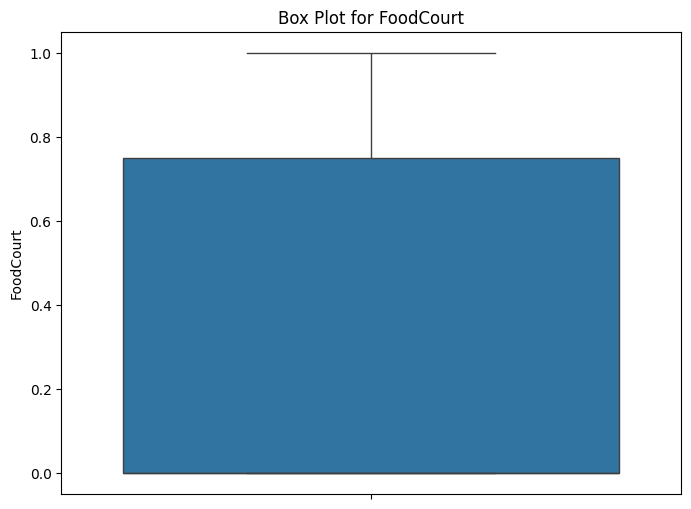

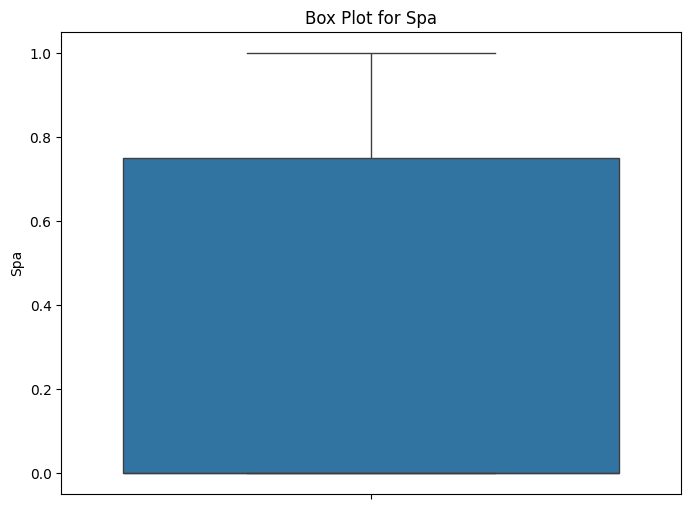

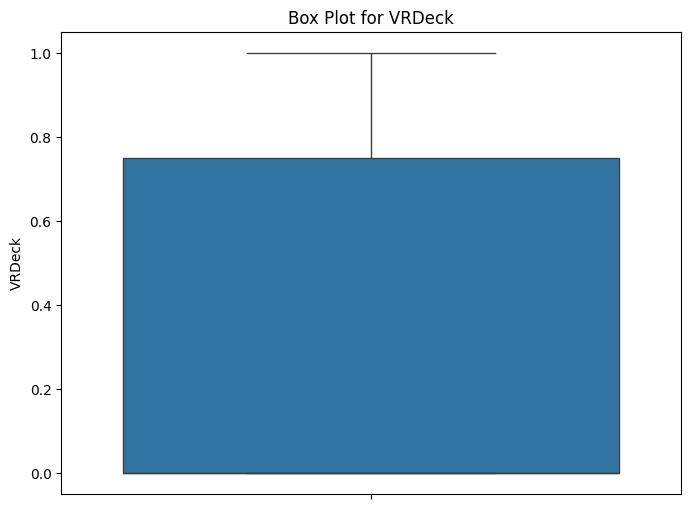

In [109]:
from sklearn.preprocessing import QuantileTransformer

# Apply rank transformation to each numerical feature (excluding 'age')
for column in numerical_features:
    if column != 'Age':
        transformer = QuantileTransformer(output_distribution='uniform', random_state=42)
        numerical_features[column] = transformer.fit_transform(numerical_features[column].values.reshape(-1, 1))
        data[column] = transformer.fit_transform(data[column].values.reshape(-1, 1))


# Set the size of the figure
plt.figure(figsize=(16, 8))

# Iterate through each numerical feature and create a box plot (including 'age')
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])  # Use 'y' instead of 'x'
    plt.title(f'Box Plot for {column}')
    plt.show()


## Check for multicollinearity

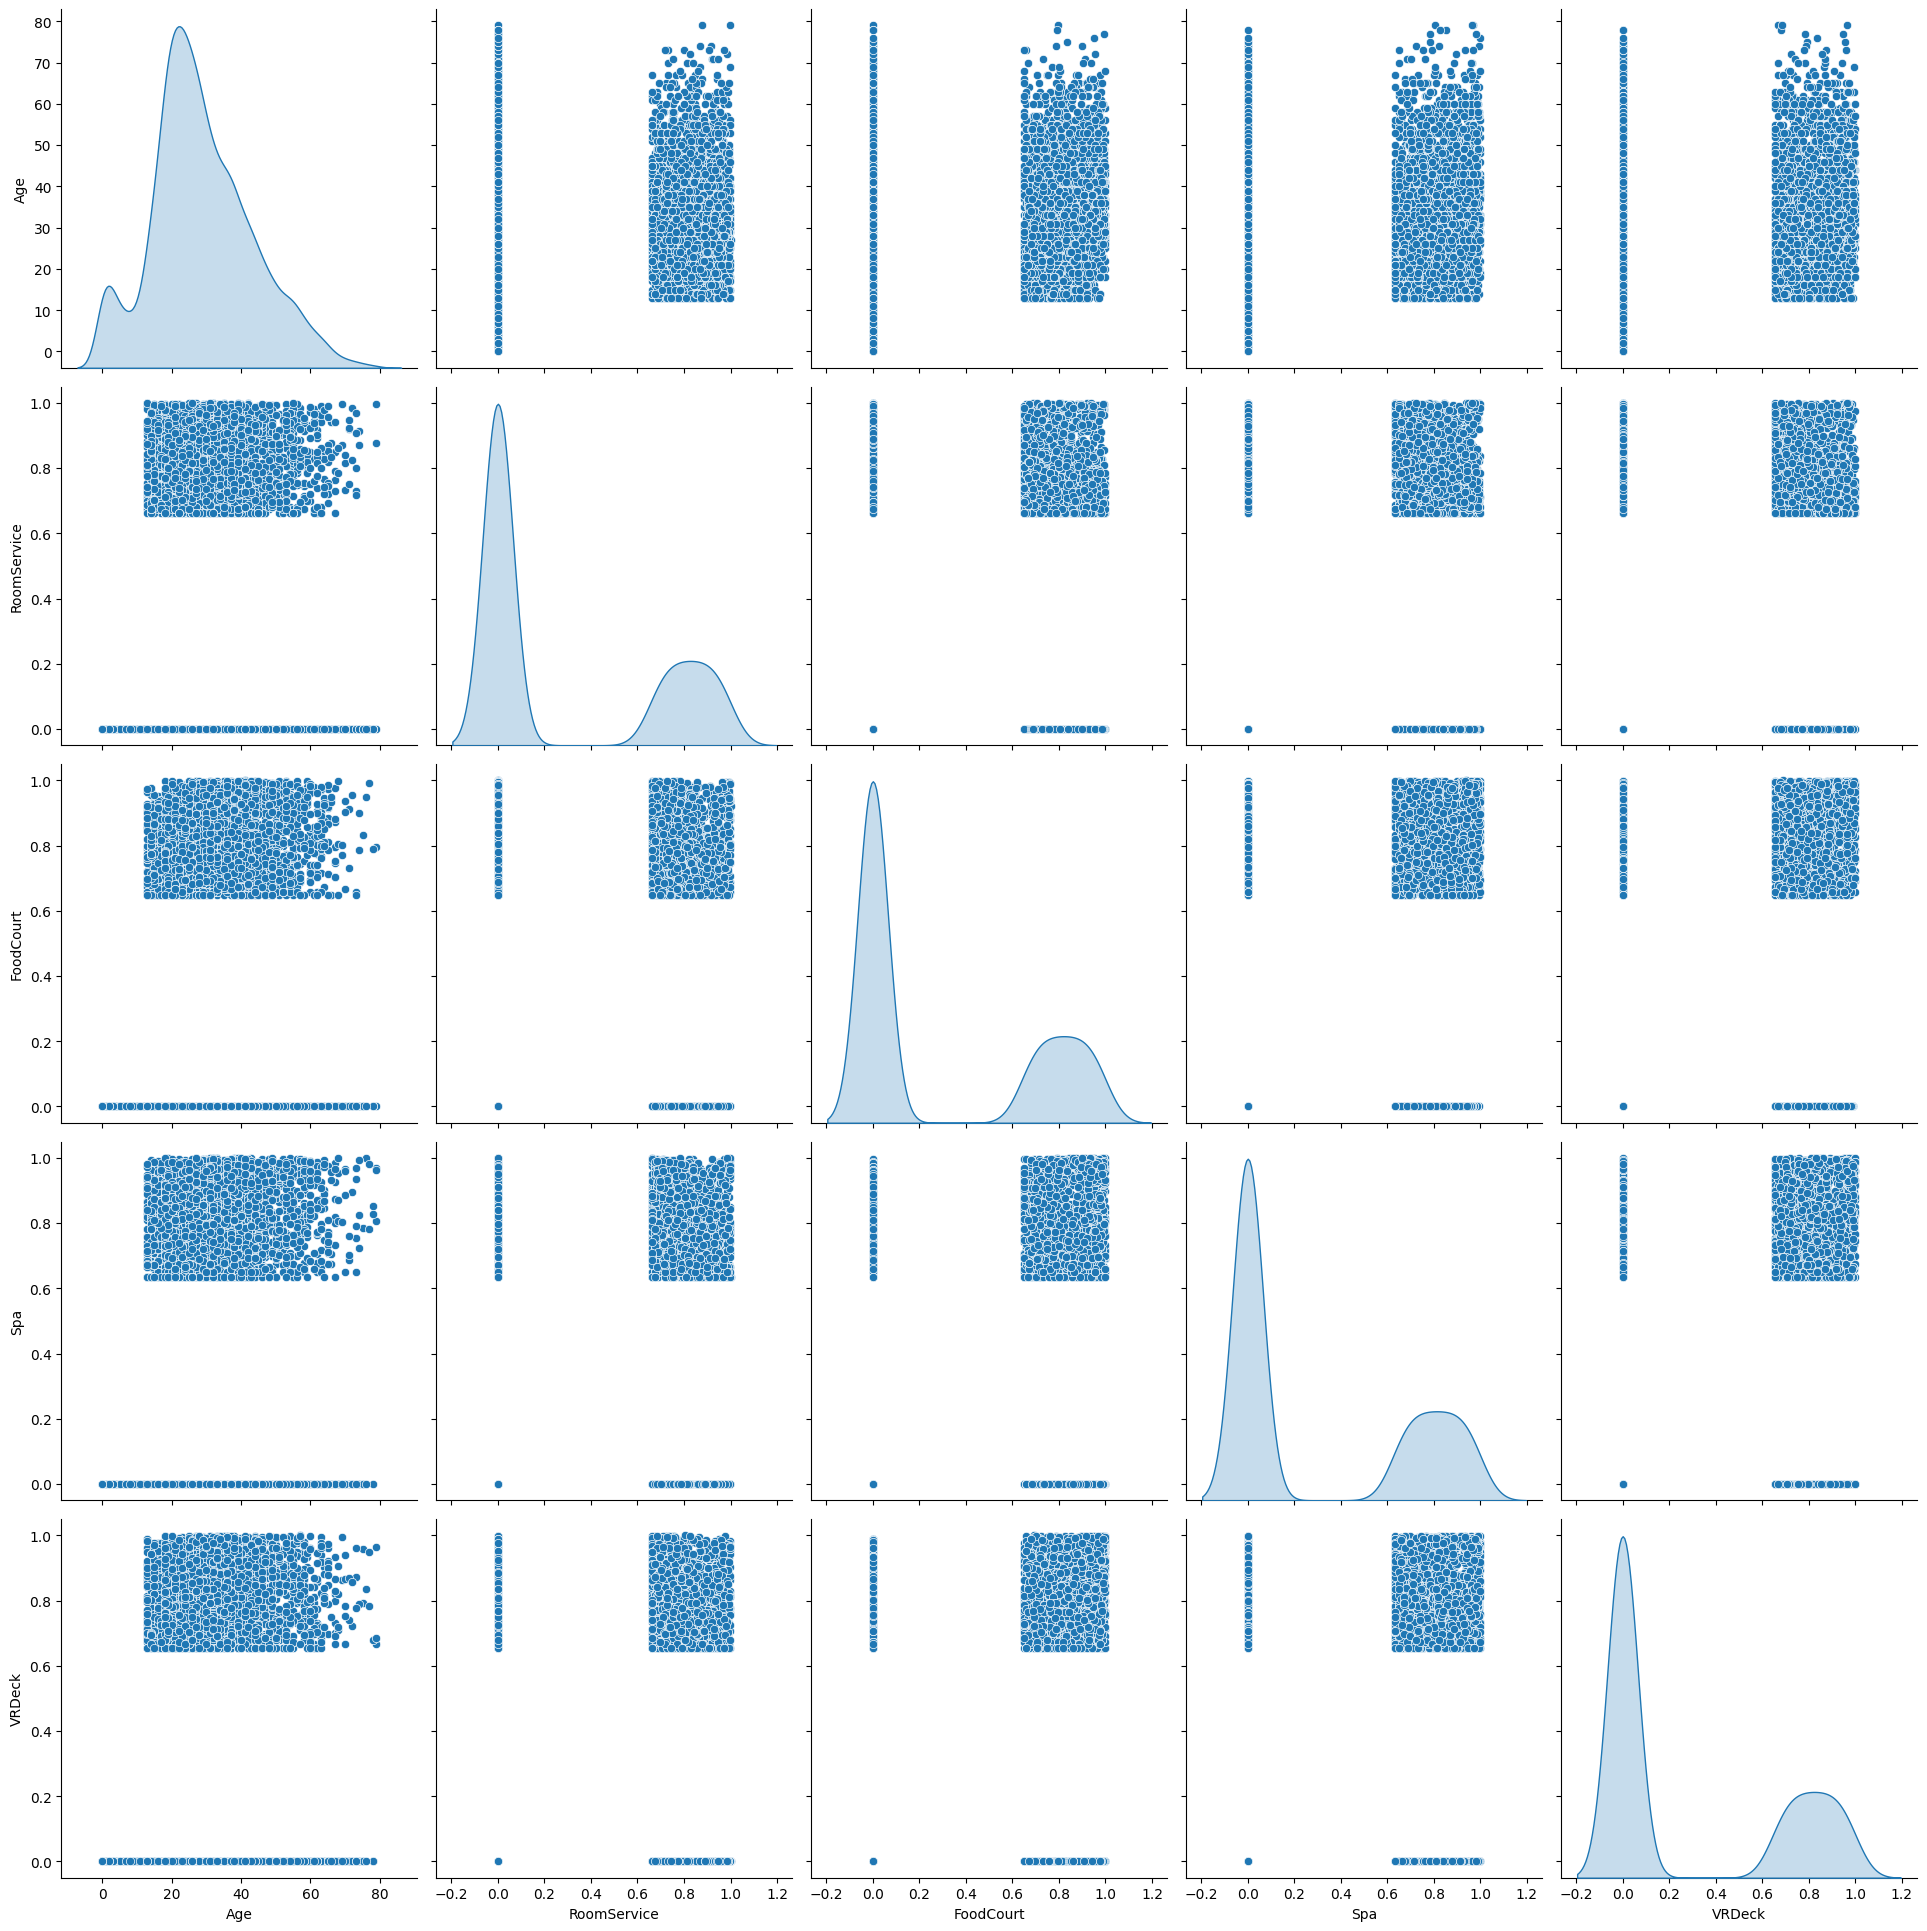

In [110]:
#Check for multicollinearity using Scatter Matrix
scatter_matrix = sns.pairplot(numerical_features, diag_kind='kde', plot_kws={'alpha': 1})
scatter_matrix.fig.set_size_inches(20, 20)
plt.show()

there aren't multicorlinearty

## Features Distributions

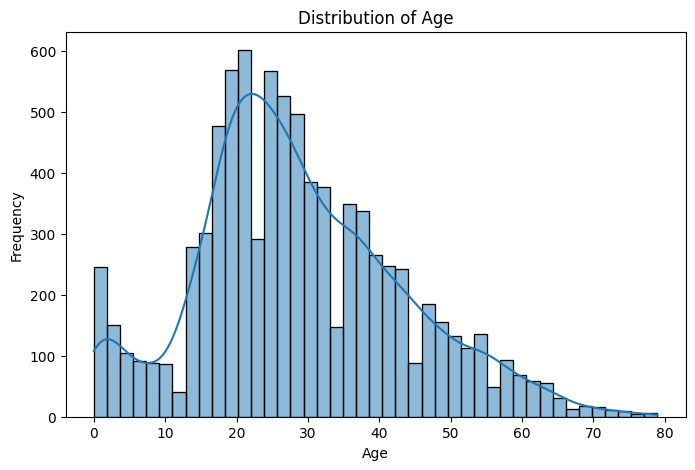

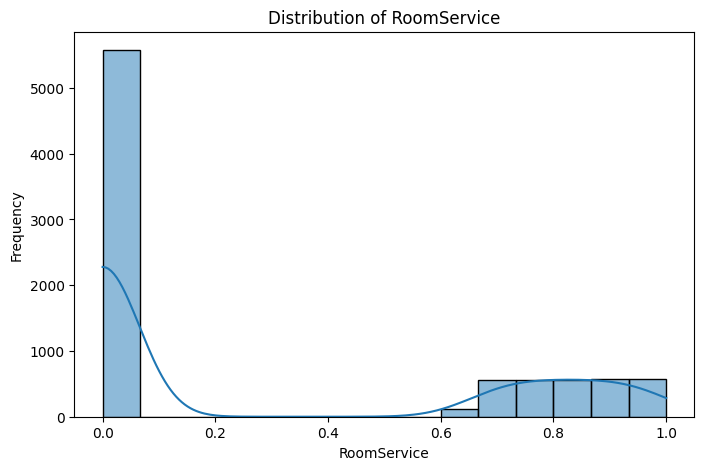

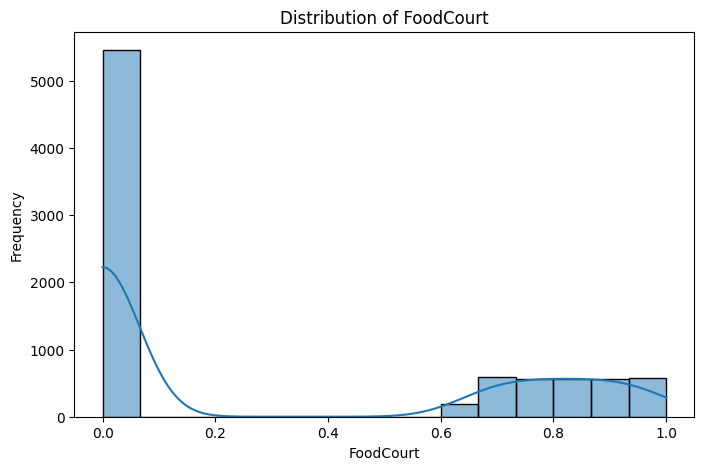

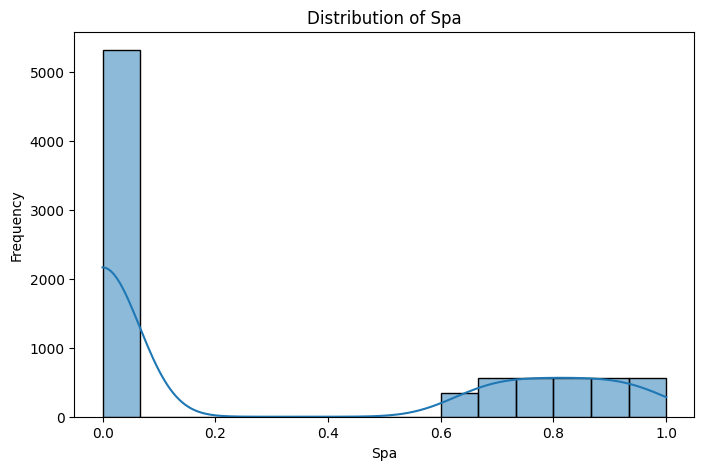

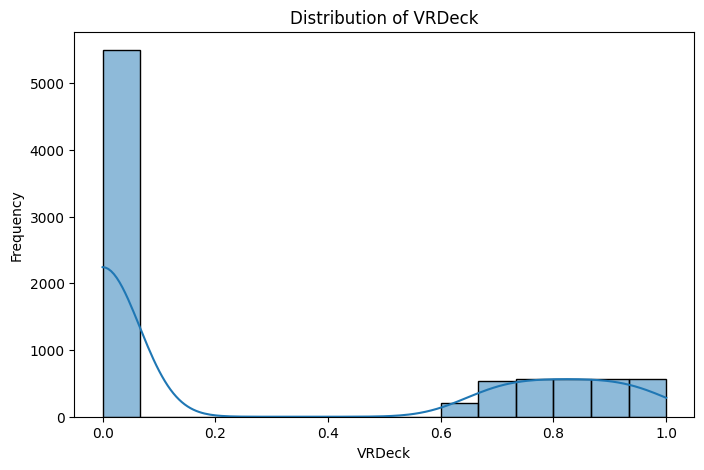

In [111]:
# Assuming numerical_features is your DataFrame containing numerical features
for column in numerical_features.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=numerical_features[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.ylabel('Frequency')
    plt.show()


# EDA and Preprocessing For Categorical Features

In [112]:
#select the catgorical features only and drop target
categorical_features = data.select_dtypes(include=[object])

## Ensure From The Data Types

In [113]:
head_categorical=categorical_features.head()

html_head_categorical = create_scrollable_table(head_categorical, 'head_categorical', 'Head of the categorical features')

# Display the HTML
display(HTML(html_head_categorical))

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


In [114]:
#the unique values of each numrical feature

def display_unique_values(dataframe):
    unique_values_html = ""
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        unique_values_html += f"<h4>Unique values for {column}:</h4>"
        unique_values_html += "<div style='max-height: 200px; overflow-y: auto;'>"
        unique_values_html += "<ul>"
        for value in unique_values:
            unique_values_html += f"<li>{value}</li>"
        unique_values_html += "</ul>"
        unique_values_html += "</div>"

    display(HTML(unique_values_html))

# Call the function to display unique values
display_unique_values(categorical_features)

## Summary statistics for categorical features

In [115]:
# Now you can proceed with the summary statistics or any other analysis
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical))

,count,unique,top,freq
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


## Handling the missing value

In [116]:
from sklearn.impute import SimpleImputer

def handle_missing_with_mode(data, categorical_features):
    for feature in categorical_features:
        if feature != 'Name':
            num_missing_values_before = data[feature].isnull().sum()
            print(f"Missing values in '{feature}' before handling missing: {num_missing_values_before}")

            # Convert boolean to string representation
            if data[feature].dtype == bool:
                data[feature] = data[feature].astype(str)

            # Replace missing values with the mode of the feature
            mode_imputer = SimpleImputer(strategy='most_frequent')
            data[feature] = mode_imputer.fit_transform(data[[feature]])

            num_missing_values_after = data[feature].isnull().sum()
            print(f"Missing values in '{feature}' after handling missing: {num_missing_values_after}")
            print("*******************************************************************")

    return data

# Assuming data is your DataFrame
categorical_features = data.select_dtypes(include=[object]).columns
data = handle_missing_with_mode(data, categorical_features)

Missing values in 'HomePlanet' before handling missing: 201
Missing values in 'HomePlanet' after handling missing: 0
*******************************************************************
Missing values in 'CryoSleep' before handling missing: 217
Missing values in 'CryoSleep' after handling missing: 0
*******************************************************************
Missing values in 'Cabin' before handling missing: 199
Missing values in 'Cabin' after handling missing: 0
*******************************************************************
Missing values in 'Destination' before handling missing: 182
Missing values in 'Destination' after handling missing: 0
*******************************************************************
Missing values in 'VIP' before handling missing: 203
Missing values in 'VIP' after handling missing: 0
*******************************************************************


In [117]:
def handle_missing_in_name(data):
    feature = 'Name'
    num_missing_values_before = data[feature].isnull().sum()
    print(f"Missing values in '{feature}' before handling missing: {num_missing_values_before}")

    # Special handling for 'Name' column
    data[feature].fillna("No Name", inplace=True)

    num_missing_values_after = data[feature].isnull().sum()
    print(f"Missing values in '{feature}' after handling missing: {num_missing_values_after}")
    print("*******************************************************************")

    return data

# Assuming data is your DataFrame
data = handle_missing_in_name(data)

Missing values in 'Name' before handling missing: 200
Missing values in 'Name' after handling missing: 0
*******************************************************************


## Chi_Squre Test

In [118]:
from scipy.stats import chi2_contingency
import pandas as pd
from tabulate import tabulate  # Ensure you have the tabulate library installed

def chi_square_test(data, categorical_features, target_column):
    results = []
    for column in categorical_features:
        contingency_table = pd.crosstab(data[column], data[target_column])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        results.append([column, chi2, p, "Significant" if p < 0.05 else "Not Significant"])

    return results

# Assuming data is your DataFrame
categorical_features = data.select_dtypes(include=[object]).columns
target_column = 'Transported'  # Replace with your actual target column name
results = chi_square_test(data, categorical_features, target_column)

# Create a DataFrame from the results
result_df = pd.DataFrame(results, columns=["Feature", "Chi2 Statistic", "P-value", "Significance"])

# Print the tabulated results
print('Chi-square Test Between The Target Variable (Transported) And the Categorical Features:')
print(tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False))


Chi-square Test Between The Target Variable (Transported) And the Categorical Features:
+-------------+--------------------+------------------------+-----------------+
|   Feature   |   Chi2 Statistic   |        P-value         |  Significance   |
+-------------+--------------------+------------------------+-----------------+
| HomePlanet  | 318.93444995471856 | 5.549631517016864e-70  |   Significant   |
|  CryoSleep  | 1838.5677340571679 |          0.0           |   Significant   |
|    Cabin    | 6849.431812445361  |  0.006121140153794818  |   Significant   |
| Destination | 105.56297434781096 | 1.1947894351445014e-23 |   Significant   |
|     VIP     | 11.575951627085105 | 0.0006681023600149099  |   Significant   |
|    Name     |  8475.00855064033  |  0.49180257068629785   | Not Significant |
+-------------+--------------------+------------------------+-----------------+


we note that Name is not significant with the target variable and we can remove it from the data

In [119]:
data = data.drop('Name', axis=1)

In [120]:
categorical_features = categorical_features.drop(['Name'])


In [121]:
data = data.drop(['Cabin'], axis=1)


In [122]:
categorical_features = categorical_features.drop(['Cabin'])

In [123]:
# Apply one-hot encoding excluding 'SeniorCitizen'
data_encoded = pd.get_dummies(data[categorical_features])

# Replace the original categorical columns with the one-hot encoded columns
data = pd.concat([data.drop(columns=categorical_features), data_encoded], axis=1)

#ensure
head = data.head()
# create_scrollable_table is defined somewhere in your code
html_head = create_scrollable_table(head, 'head', 'Head of the dataset')

# Display the HTML table to show all features
display(HTML(html_head))

,Age,RoomService,FoodCourt,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39,0.000000,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,0,1,1,0
1,24,0.783189,0.697698,0.868674,0.753754,1,1,0,0,1,0,0,0,1,1,0
2,58,0.752753,0.963860,0.993813,0.757257,0,0,1,0,1,0,0,0,1,0,1
3,33,0.000000,0.913801,0.976992,0.814043,0,0,1,0,1,0,0,0,1,1,0
4,16,0.828428,0.753271,0.871788,0.674174,1,1,0,0,1,0,0,0,1,1,0


# Applying classification model using deep learning


In [124]:
data.shape


(8693, 16)

In [125]:
# Data Separation as X and Y
y= data['Transported']
x= data.drop('Transported',axis=1)
print(y.value_counts())

1    4378
0    4315
Name: Transported, dtype: int64


In [126]:
# Assuming x and y are your input features and target variable
X_train, X_val, y_train, y_val = train_test_split(x, y, stratify=y, train_size=0.98, random_state=42)

In [127]:
#Scale the data
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_val= scaler.fit_transform(X_val)

Epoch 1/150
29/29 [==============================] - 3s 22ms/step - loss: 0.5583 - f1score: 0.7095 - binary_accuracy: 0.7236 - val_loss: 0.5272 - val_f1score: 0.7895 - val_binary_accuracy: 0.7701
Epoch 2/150
29/29 [==============================] - 0s 8ms/step - loss: 0.5101 - f1score: 0.7408 - binary_accuracy: 0.7460 - val_loss: 0.5026 - val_f1score: 0.7746 - val_binary_accuracy: 0.7759
Epoch 3/150
29/29 [==============================] - 0s 8ms/step - loss: 0.5053 - f1score: 0.7438 - binary_accuracy: 0.7514 - val_loss: 0.4875 - val_f1score: 0.7791 - val_binary_accuracy: 0.7816
Epoch 4/150
29/29 [==============================] - 0s 7ms/step - loss: 0.4960 - f1score: 0.7528 - binary_accuracy: 0.7571 - val_loss: 0.4807 - val_f1score: 0.7692 - val_binary_accuracy: 0.7759
Epoch 5/150
29/29 [==============================] - 0s 8ms/step - loss: 0.4956 - f1score: 0.7475 - binary_accuracy: 0.7578 - val_loss: 0.4726 - val_f1score: 0.7692 - val_binary_accuracy: 0.7759
Epoch 6/150
29/29 [=====

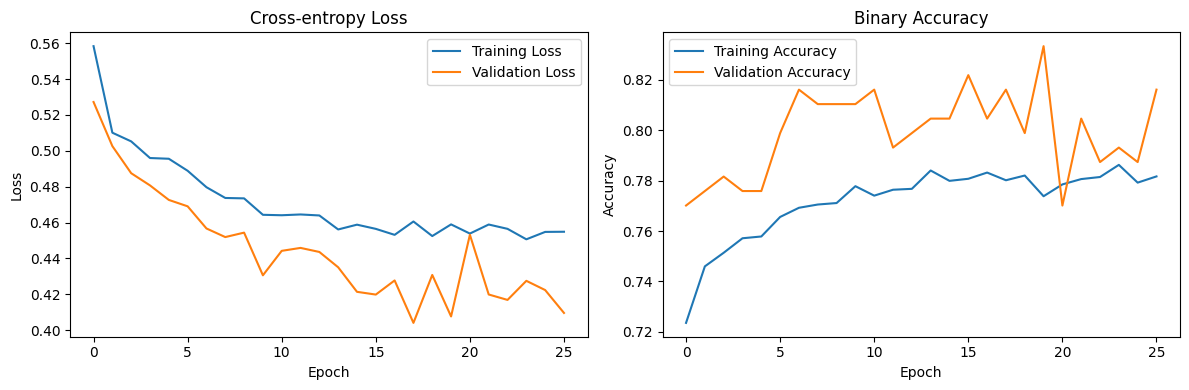

In [128]:
# Build the model with Batch Normalization
model = Sequential([
    BatchNormalization(input_shape=[15]),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),


    Dense(50, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    BatchNormalization(),
    Dense(1, activation='sigmoid'),

])

# Define the custom F1 score function
def f1score(y_true, y_pred):
    y_pred = tf.round(y_pred)

    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    actual_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (actual_positives + tf.keras.backend.epsilon())

    f1score_val = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

    return f1score_val

optimizer = Adam(learning_rate=0.01)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[f1score, 'binary_accuracy'])


# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=300,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation set
loss, accuracy, f1_score = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}, Validation F1 Score: {f1_score}')


# Print the keys in the training history
print(history.history.keys())

# Plot training history
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Binary Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()